In [9]:
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [10]:
prefix = './results/'
cases = ['lamb-oseen', 'sin']
# models = ['RAFT-PIV','RAFT-SS-PIV','UnLiteFlowNet-PIV']
models = ['RAFT-PIV','RAFT-SS-PIV-DEF','RAFT-SS-PIV','UnLiteFlowNet-PIV']
# models.sort()

path2oseen = glob(prefix+cases[0]+'/*')
path2oseen.sort()
path2sin = glob(prefix+cases[1]+'/*')
path2sin.sort()


In [11]:
print(models)
print(path2oseen)
print(path2sin)

['RAFT-PIV', 'RAFT-SS-PIV-DEF', 'RAFT-SS-PIV', 'UnLiteFlowNet-PIV']
['./results/lamb-oseen/RAFT-PIV.npz', './results/lamb-oseen/RAFT-SS-PIV-DEF.npz', './results/lamb-oseen/RAFT-SS-PIV.npz', './results/lamb-oseen/UnLiteFlowNet-PIV.npz']
['./results/sin/RAFT-PIV.npz', './results/sin/RAFT-SS-PIV-DEF.npz', './results/sin/RAFT-SS-PIV.npz', './results/sin/UnLiteFlowNet-PIV.npz']


In [17]:
def readNPZ(path):
    data = np.load(path)
    return data['data'], data['preds'], data['gts']
    
oseenDict = dict()
ossenPredDict = dict()
ossenGtDict = dict()
for i in range(len(path2oseen)):
    oseenDict[models[i]], ossenPredDict[models[i]], ossenGtDict[models[i]] = readNPZ(path2oseen[i])

sinDict = dict()
sinPredDict = dict()
sinGtDict = dict()
for i in range(len(path2sin)):
    sinDict[models[i]], sinPredDict[models[i]], sinGtDict[models[i]] = readNPZ(path2sin[i])

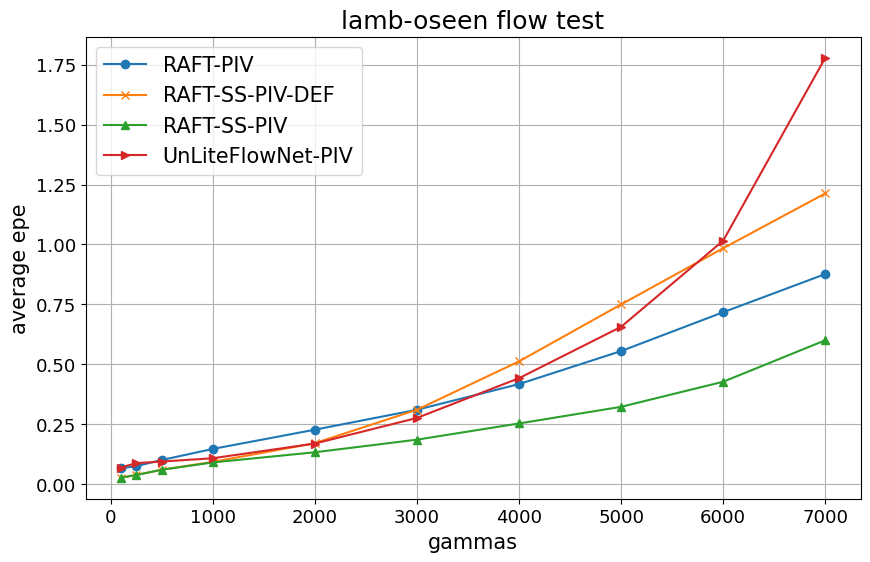

In [13]:
# lamb-oseen flow
gammas = [1e2 ,2.5e2 ,5e2 ,1e3 , 2e3, 3e3, 4e3, 5e3, 6e3, 7e3]
marks = ['o','x','^','>']

plt.rc('figure',figsize=(10,6))
plt.rc('legend',fontsize=15)
plt.rc('axes',labelsize=15)
plt.rc('xtick',labelsize=13)
for i in range(len(models)):
    plt.plot(gammas,oseenDict[models[i]], label=models[i], marker=marks[i])
    
plt.title('lamb-oseen flow test', fontsize=18)
plt.ylabel('average epe')
plt.xlabel('gammas')
plt.legend()
plt.grid()
plt.show()

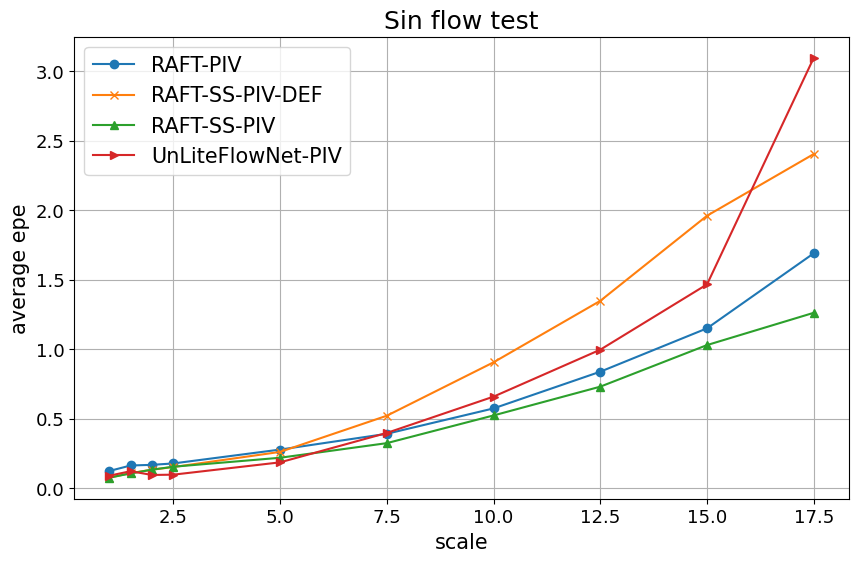

In [14]:
# sin flow
scale = [1., 1.5, 2., 2.5, 5.0, 7.5, 10., 12.5, 15, 17.5]
marks = ['o','x','^','>']

plt.rc('figure',figsize=(10,6))
plt.rc('legend',fontsize=15)
plt.rc('axes',labelsize=15)
plt.rc('xtick',labelsize=13)
plt.rc('ytick',labelsize=13)
for i in range(len(models)):
    plt.plot(scale,sinDict[models[i]], label=models[i], marker=marks[i])
    
plt.legend()
plt.grid()
plt.title('Sin flow test',fontsize=18)
plt.xlabel('scale')
plt.ylabel('average epe')
plt.show()

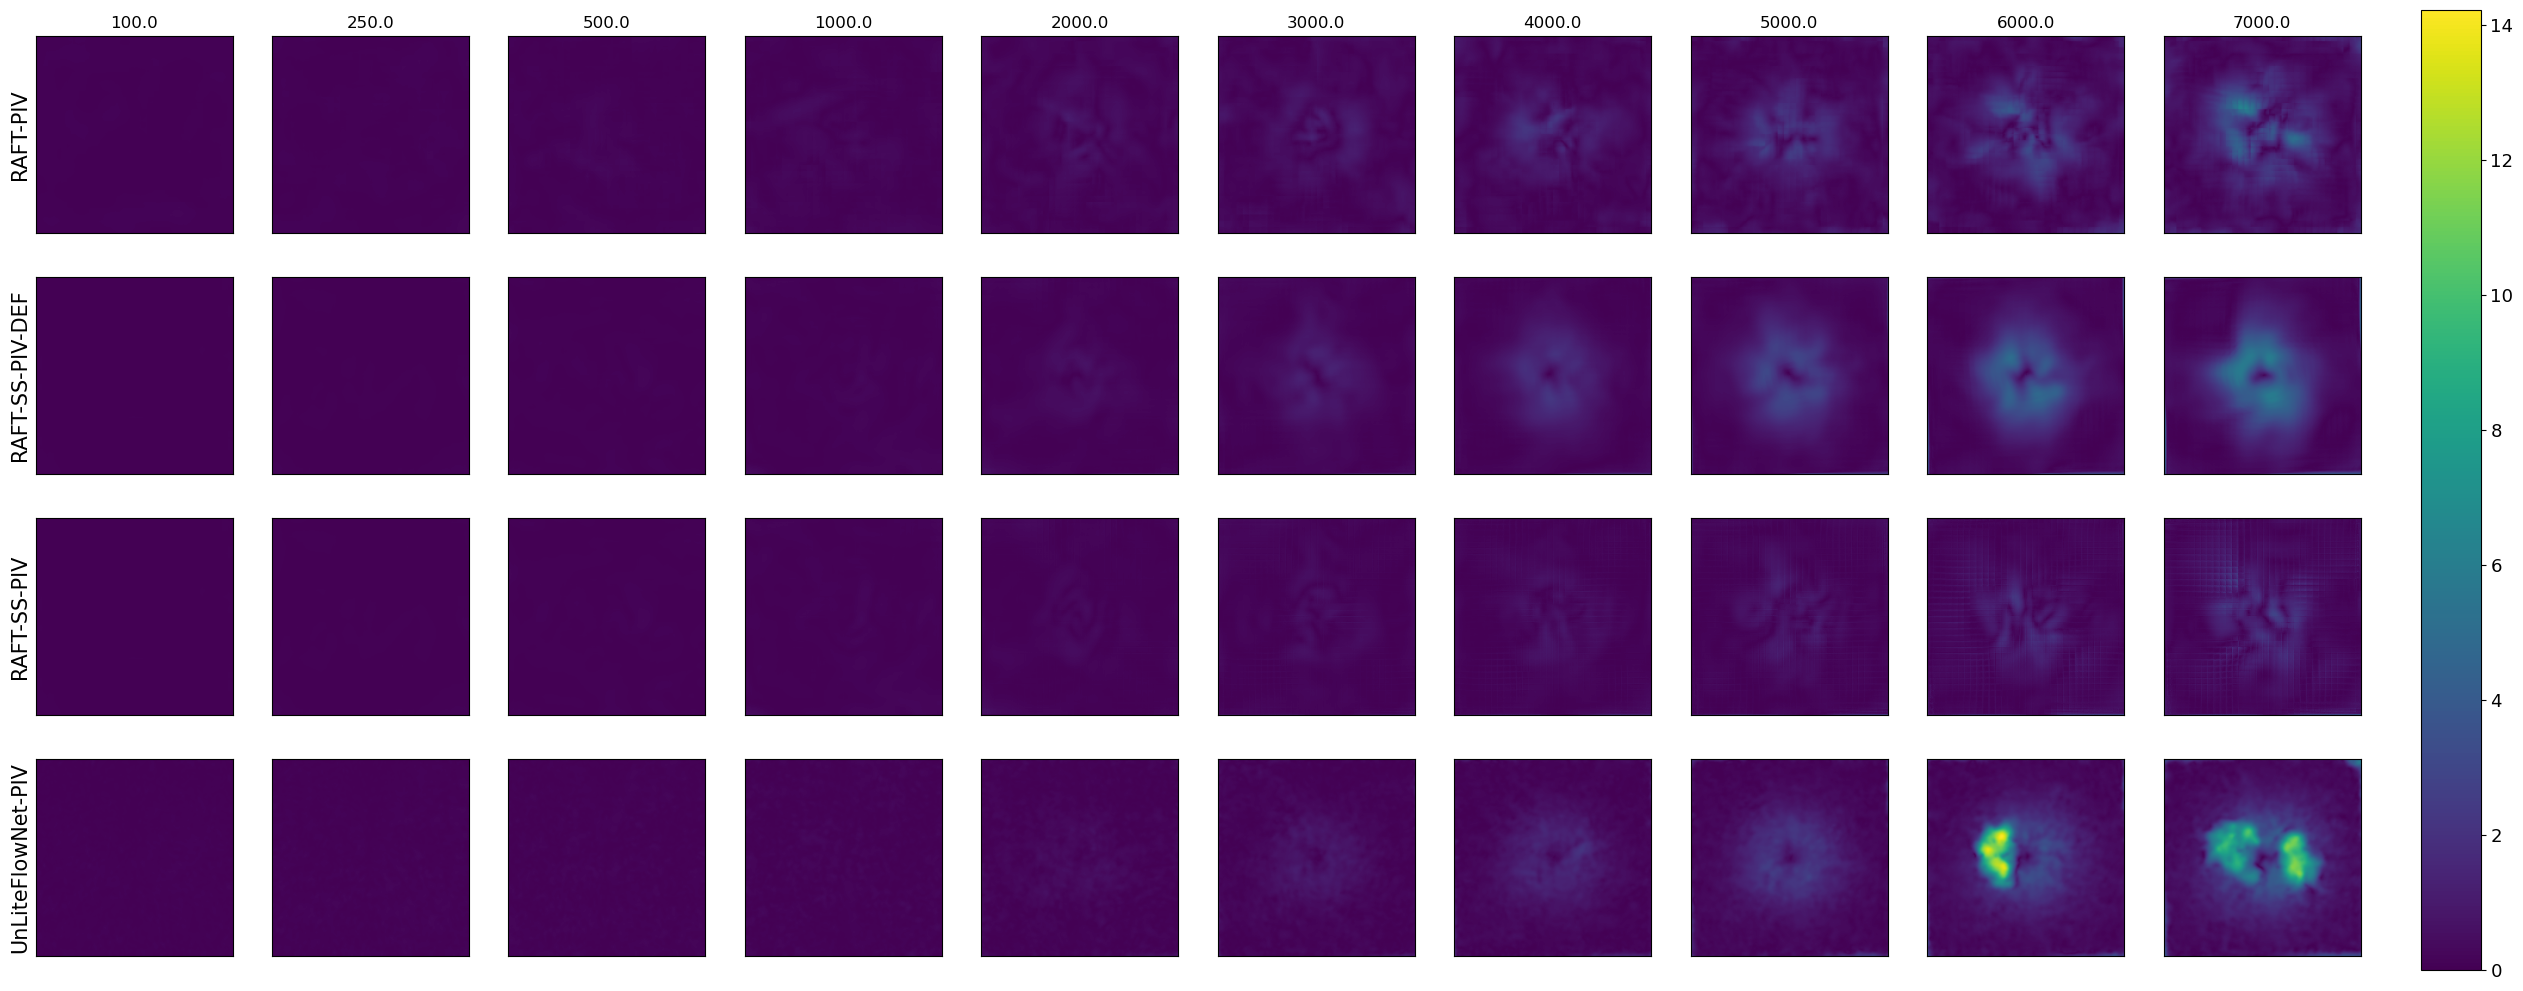

In [65]:
cmax = 0

fig, axs = plt.subplots(4,10,figsize=(30,12))
for i in range(len(models)):
    preds = ossenPredDict[models[i]][:,-1,...]
    gts = ossenGtDict[models[i]][:,-1,...]

    epes = np.sqrt(np.sum(np.square(preds - gts),axis=1))
    if np.max(epes) > cmax:
        cmax = np.max(epes)
    for j in range(epes.shape[0]):
        im = axs[i][j].imshow(epes[j])

        im.set_clim(0,14.217229)
        if i == 0:
            axs[i][j].set_title(gammas[j])
        if j == 0:
            axs[i][j].set_ylabel(models[i])
        axs[i][j].set_yticks([])
        axs[i][j].set_xticks([])

cb_ax = fig.add_axes([.92, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)

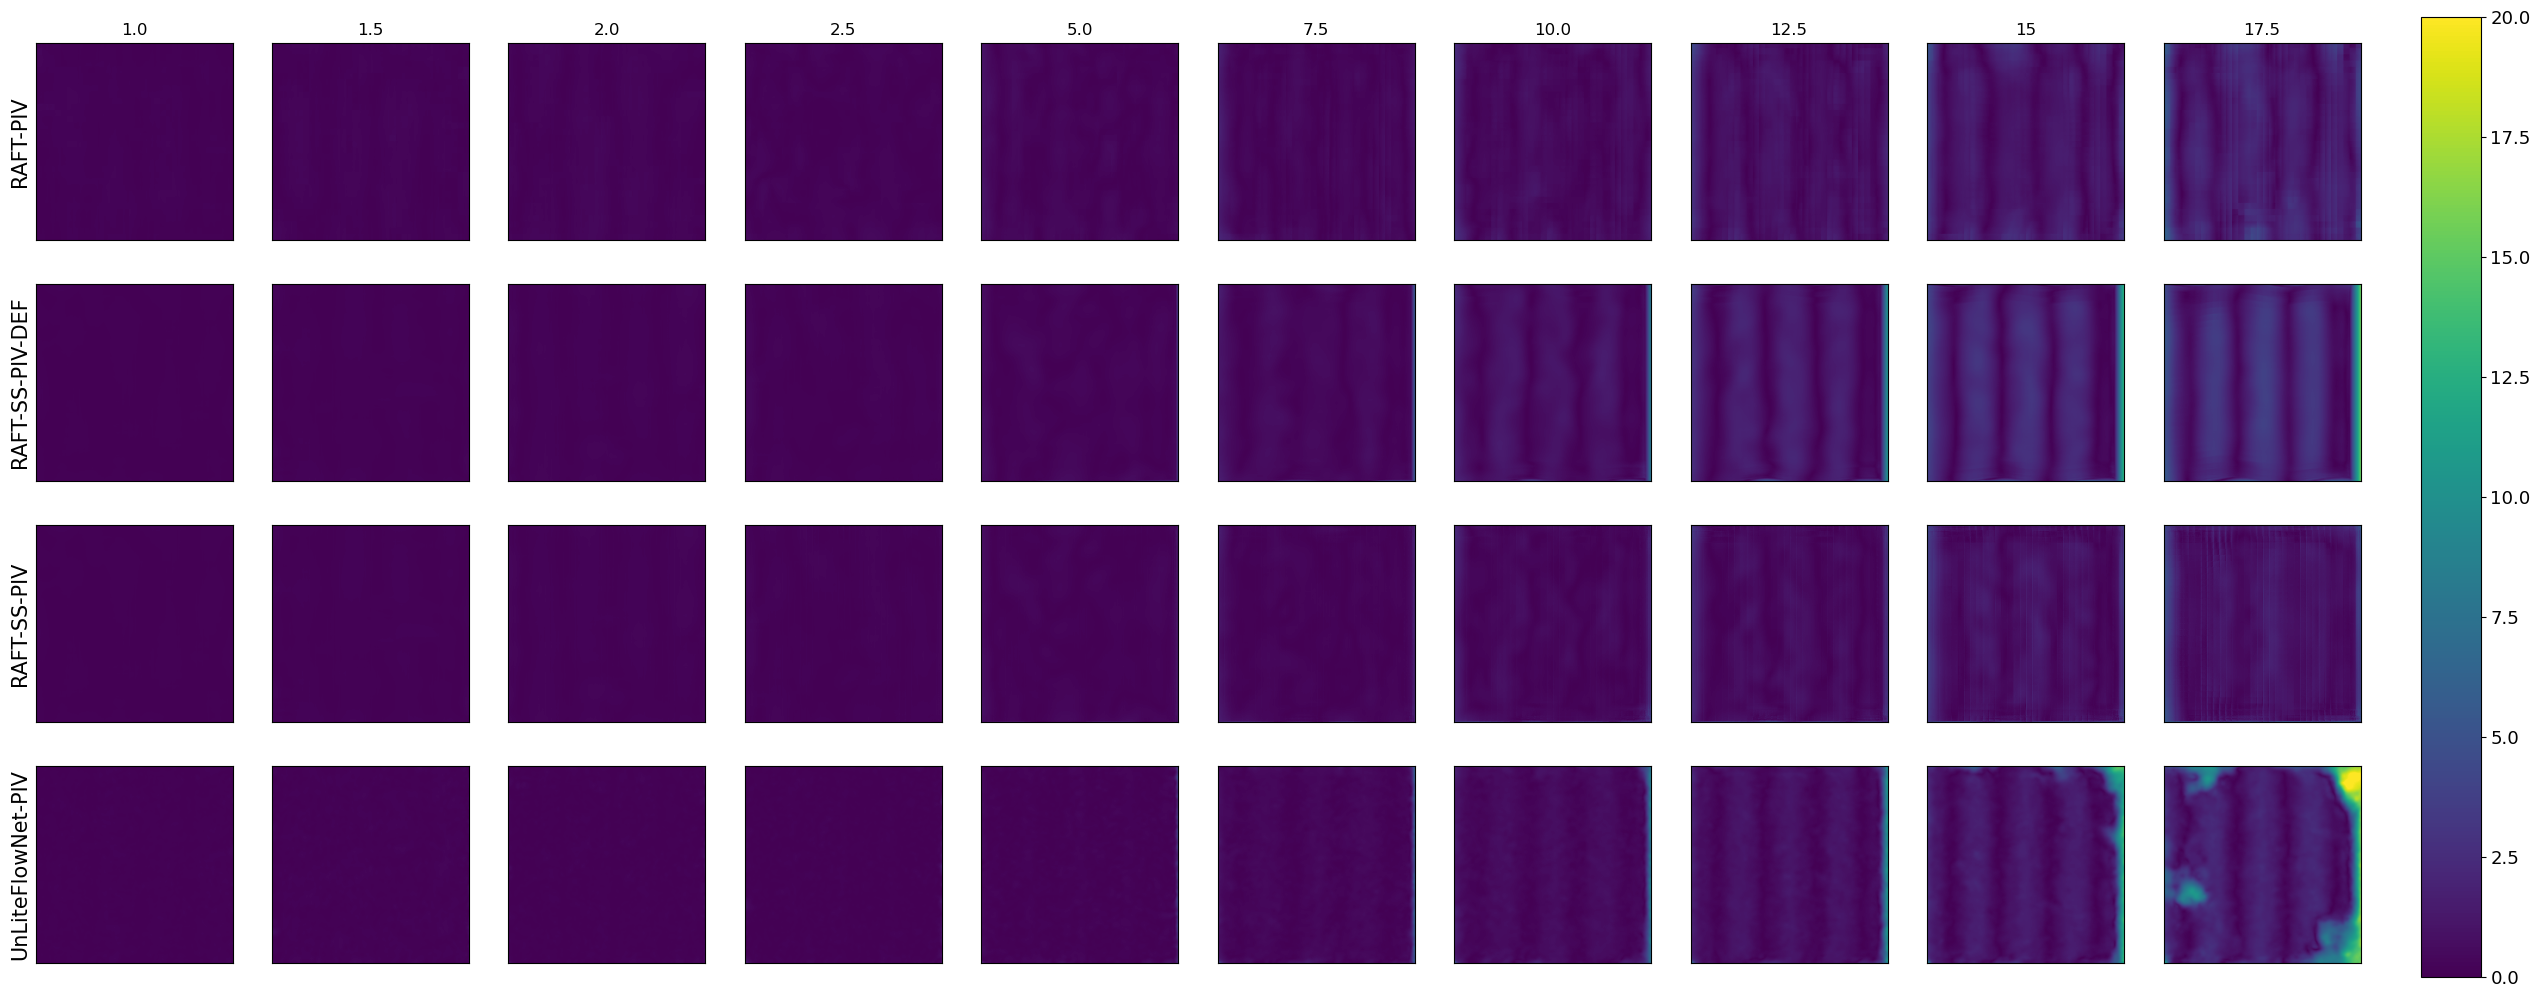

In [64]:
cmax = 0

fig, axs = plt.subplots(4,10,figsize=(30,12))
for i in range(len(models)):
    preds = sinPredDict[models[i]][:,-1,...]
    gts = sinGtDict[models[i]][:,-1,...]

    epes = np.sqrt(np.sum(np.square(preds - gts),axis=1))
    if np.max(epes) > cmax:
        cmax = np.max(epes)
    for j in range(epes.shape[0]):
        im = axs[i][j].imshow(epes[j])

        im.set_clim(0,20)
        if i == 0:
            axs[i][j].set_title(scale[j])
        if j == 0:
            axs[i][j].set_ylabel(models[i])
        axs[i][j].set_yticks([])
        axs[i][j].set_xticks([])
        
cb_ax = fig.add_axes([.92, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)


In [49]:
cmax

26.324827